<a href="https://colab.research.google.com/github/vanshika-hgnis/DemenetiaPrediction/blob/main/DemetiaPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Refrences use from kaggle**


1.   https://www.kaggle.com/code/sasakitetsuya/dementia-prediction-model#I-chose-Light-Gradient-Boosting-Machine.
2.   https://www.kaggle.com/code/tusharfaroque/dementia-prediction-using-different-ml-model/notebook#Plot-ROC-and-compare-AUC
3. https://www.kaggle.com/code/ruslankl/dementia-prediction-w-tree-based-models


*Dataset*
https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc,classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/dementia_dataset.csv')
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


# 1.Preprocessing the Data

In [ ]:

data['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [ ]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

data['Group'] = le.fit_transform(data['Group'])
data['M/F'] = le.fit_transform(data['M/F'])
data['Hand'] = le.fit_transform(data['Hand'])
data.sample(10)



,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
338,OAS2_0172,OAS2_0172_MR1,1,1,0,1,0,75,16,1.0,30.0,0.5,1891,0.709,0.928
371,OAS2_0186,OAS2_0186_MR2,2,2,763,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323
13,OAS2_0008,OAS2_0008_MR1,2,1,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
186,OAS2_0088,OAS2_0088_MR2,1,2,751,1,0,80,12,4.0,20.0,1.0,1494,0.661,1.175
289,OAS2_0141,OAS2_0141_MR2,2,2,1022,0,0,68,18,2.0,29.0,0.0,1290,0.795,1.361
104,OAS2_0049,OAS2_0049_MR3,2,3,687,0,0,71,16,3.0,30.0,0.0,1503,0.788,1.168
95,OAS2_0047,OAS2_0047_MR1,2,1,0,0,0,77,16,2.0,29.0,0.0,1433,0.723,1.225
324,OAS2_0161,OAS2_0161_MR1,2,1,0,1,0,77,16,1.0,29.0,0.0,1818,0.734,0.965
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
221,OAS2_0104,OAS2_0104_MR1,1,1,0,1,0,70,16,1.0,25.0,0.5,1568,0.696,1.119


<ipython-input-22-5b70fe5c7f33>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Group', palette='Set2').set(title = 'Dementia Group');
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

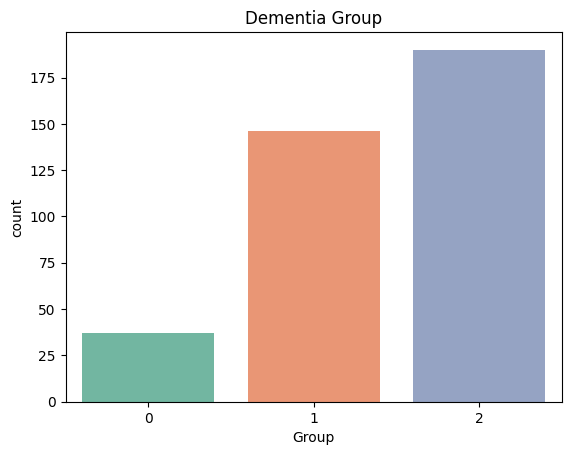

In [ ]:
sns.countplot(data=data, x='Group', palette='Set2').set(title = 'Dementia Group');

Sex:
0 : F
1 : M


Group:
0 : Demented
1 : Nondemented


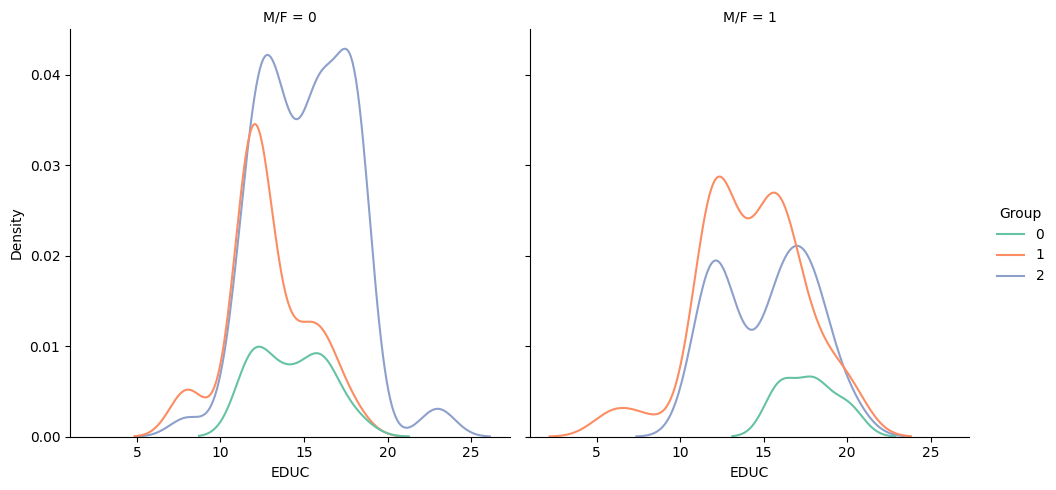

In [ ]:
sns.displot(data=data, x='EDUC', col='M/F', palette='Set2', hue='Group', kind='kde');

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


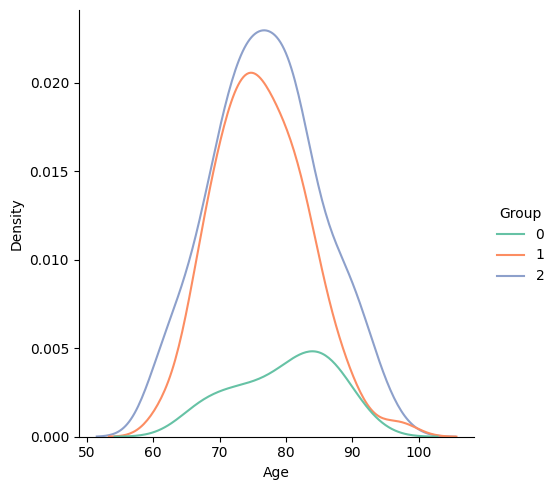

In [ ]:
sns.displot(data=data, x='Age', hue='Group', kind="kde", palette='Set2');

# 2.Feature Selection


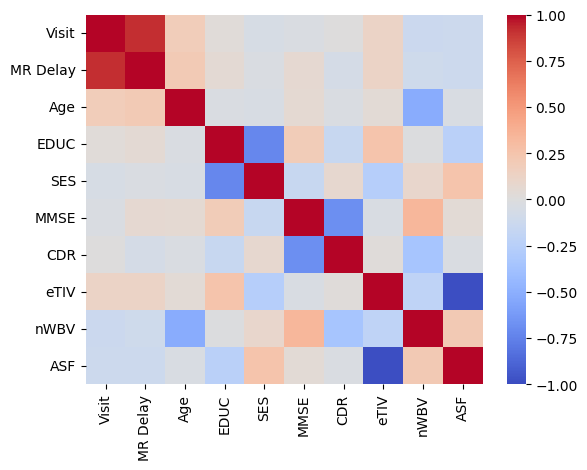

In [ ]:

sns.heatmap(data.corr(numeric_only=True), vmin=-1, cmap='coolwarm');

In [ ]:

if 'ASF' in data.columns:
    data.drop(columns=['ASF'], inplace=True)
else:
    print("Column 'ASF' not found in the DataFrame.")

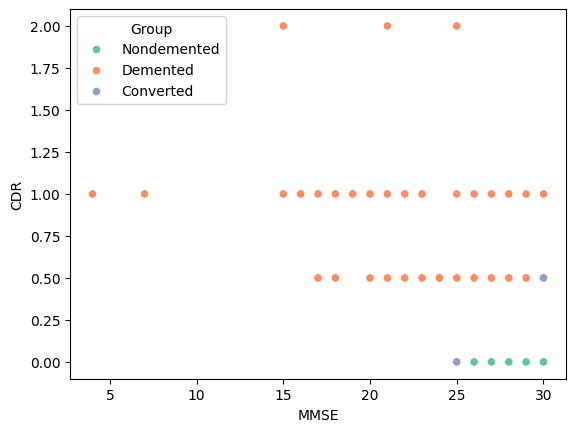

In [ ]:

sns.scatterplot(data=data, x='MMSE', y='CDR', palette='Set2', hue='Group');

# Methods

1. **Random Forest Classifier with Feature Selection** (e.g., LASSO or PCA)
Reason: Random Forest is highly effective for tabular data, handling both categorical and continuous features well. It’s robust against overfitting on smaller datasets and provides feature importance, which can help identify significant predictors of dementia.
Approach: Use feature selection (like LASSO or PCA) to reduce feature dimensionality before applying the Random Forest, which may improve accuracy and model interpretability.
2. **Support Vector Machine (SVM)**
Reason: SVM is powerful for classification tasks in structured data, especially with a clear margin between classes (e.g., Demented vs. Non-demented).
Approach: Experiment with kernel functions (linear, RBF) to find the best decision boundary for your dataset. SVMs can handle high-dimensional data well, so even if feature selection is minimal, it could perform effectively.
3. **Gradient Boosting Machines (GBM)**
Reason: Gradient Boosting models (e.g., XGBoost or CatBoost) perform well on structured data by iteratively building weak models and combining them, making them accurate and adaptable to complex decision boundaries.
Approach: Focus on hyperparameter tuning to optimize performance, and consider using GBM’s built-in feature importance for interpretability. Ensemble methods like this are often effective on diverse datasets.
**4.Logistic Regression with Regularization**
Reason: Logistic Regression, especially with L2 regularization, can be effective for binary classification problems and is highly interpretable, which is advantageous for medical data.
Approach: Apply regularization (L1/L2) to avoid overfitting, particularly if your dataset has a small number of samples compared to features. Logistic regression also provides probabilistic outputs, which can be useful for clinical interpretation.


**5.Multi-Layer Perceptron (MLP) / Feedforward Neural Network**
Reason: MLPs can capture complex patterns in tabular data when the dataset is reasonably sized. They are more flexible than logistic regression but still interpretable to an extent with simpler architectures.
Approach: Use a basic 2-3 layer architecture with regularization techniques like dropout to prevent overfitting. An MLP can capture interactions among predictors that simpler models might miss.

In [ ]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,0,80,12,NaN,22.0,0.5,1698,0.701,1.034


# 3. Random Forrest 89.3%

In [ ]:
selected_features = ['MMSE', 'CDR', 'Age', 'eTIV', 'nWBV','M/F','EDUC','ASF','Hand','MR Delay','SES']
X = data[selected_features]
y = data['Group']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)






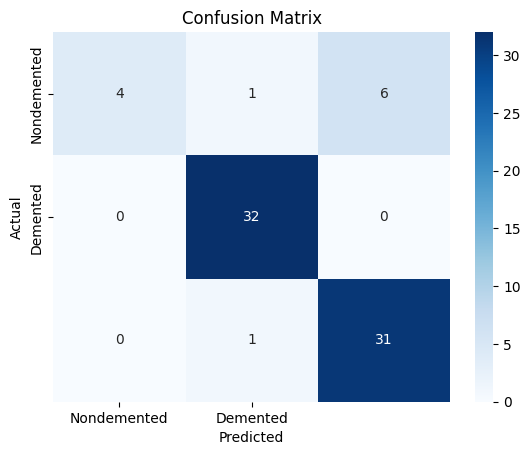

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.94      1.00      0.97        32
           2       0.84      0.97      0.90        32

    accuracy                           0.89        75
   macro avg       0.93      0.78      0.80        75
weighted avg       0.91      0.89      0.88        75

Accuracy: 0.89


In [ ]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'], yticklabels=['Nondemented', 'Demented'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


#  XGBoost or CatBoost 89.3%

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:17:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:17:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

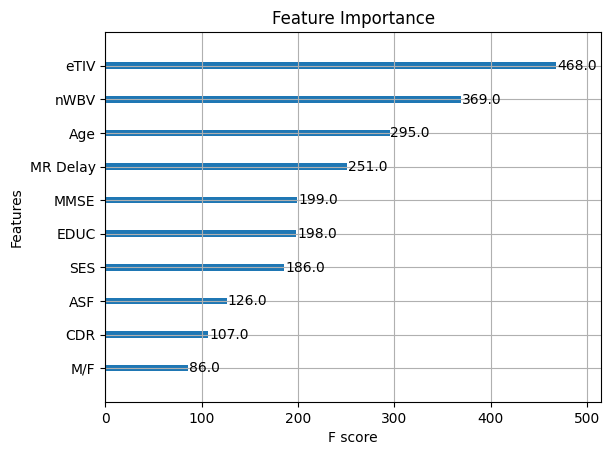

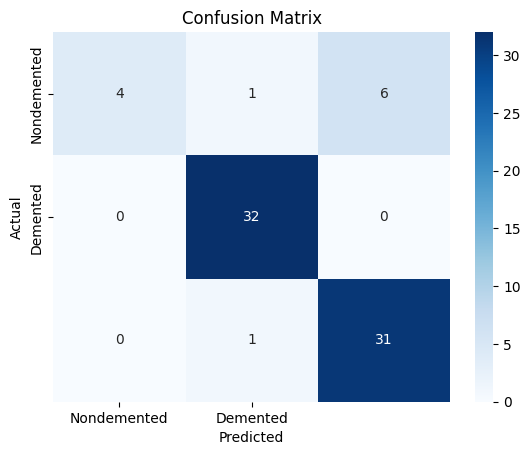

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.94      1.00      0.97        32
           2       0.84      0.97      0.90        32

    accuracy                           0.89        75
   macro avg       0.93      0.78      0.80        75
weighted avg       0.91      0.89      0.88        75

Accuracy: 0.89


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)



# Plot Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'], yticklabels=['Nondemented', 'Demented'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# SVM   89.3%

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training and test data
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies as needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Initialize SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)


# Evaluate Linear Kernel SVM
print("Linear Kernel SVM Performance:")
y_pred_linear = svm_linear.predict(X_test)
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))
print(f"Accuracy score SVM kernel linear: {accuracy_score(y_test,y_pred)}")
# Evaluate RBF Kernel SVM
print("\nRBF Kernel SVM Performance:")
y_pred_rbf = svm_rbf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
print(f"Accuracy score SVM kernel RBF: {accuracy_score(y_test,y_pred)}")

Linear Kernel SVM Performance:
[[ 2  1  8]
 [ 3 29  0]
 [ 0  1 31]]
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.94      0.91      0.92        32
           2       0.79      0.97      0.87        32

    accuracy                           0.83        75
   macro avg       0.71      0.69      0.68        75
weighted avg       0.80      0.83      0.80        75

Accuracy score SVM kernel linear: 0.8933333333333333

RBF Kernel SVM Performance:
[[ 2  1  8]
 [ 1 31  0]
 [ 0  1 31]]
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.94      0.97      0.95        32
           2       0.79      0.97      0.87        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75

Accuracy score SVM kernel RBF: 0.8933333333333333


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation on the test set
print("Best parameters from Grid Search:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nBest Model Performance:")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

# Random Forest Classifier with feature selection using LASSO

In [ ]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,0,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Apply LASSO for feature selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

selected_features = np.where(lasso.coef_ != 0)[0]
X_train_lasso = X_train[:, selected_features]
X_test_lasso = X_test[:, selected_features]

In [ ]:
# Train the Random Forest classifier on LASSO-selected features
rf_lasso = RandomForestClassifier(random_state=42)
rf_lasso.fit(X_train_lasso, y_train)

print("Random Forest with LASSO-Selected Features Performance:")
y_pred_lasso = rf_lasso.predict(X_test_lasso)
print(confusion_matrix(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))


Random Forest with LASSO-Selected Features Performance:
[[ 4  1  6]
 [ 0 32  0]
 [ 0  1 31]]
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.94      1.00      0.97        32
           2       0.84      0.97      0.90        32

    accuracy                           0.89        75
   macro avg       0.93      0.78      0.80        75
weighted avg       0.91      0.89      0.88        75



In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)


print("\nRandom Forest with PCA-Reduced Features Performance:")
y_pred_pca = rf_pca.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))



Random Forest with PCA-Reduced Features Performance:
[[ 0  1 10]
 [ 1 29  2]
 [ 0  2 30]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.91      0.91      0.91        32
           2       0.71      0.94      0.81        32

    accuracy                           0.79        75
   macro avg       0.54      0.61      0.57        75
weighted avg       0.69      0.79      0.73        75



#  Logistic Regression with regularization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies as needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize and train Logistic Regression with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_l2.fit(X_train, y_train)

print("Logistic Regression with L2 Regularization Performance:")
y_pred_l2 = log_reg_l2.predict(X_test)
print(confusion_matrix(y_test, y_pred_l2))
print(classification_report(y_test, y_pred_l2))


Logistic Regression with L2 Regularization Performance:
[[ 2  1  8]
 [ 1 31  0]
 [ 0  1 31]]
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.94      0.97      0.95        32
           2       0.79      0.97      0.87        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



In [ ]:
# Initialize and train Logistic Regression with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_l1.fit(X_train, y_train)

# Evaluate L1 model
print("\nLogistic Regression with L1 Regularization Performance:")
y_pred_l1 = log_reg_l1.predict(X_test)
print(confusion_matrix(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))



Logistic Regression with L1 Regularization Performance:
[[ 2  1  8]
 [ 1 31  0]
 [ 0  1 31]]
              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.94      0.97      0.95        32
           2       0.79      0.97      0.87        32

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



# .Multi-Layer Perceptron (MLP) / Feedforward Neural Network Reason

In [ ]:
print("Unique values in y_train:", np.unique(y_train))
y_train = y_train.to_numpy()  # Convert to numpy array


Unique values in y_train: [0 1 2]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
import pandas as pd

# Assuming y_train and y_test are your target variables
print("Training set class distribution:")
print(pd.Series(y_train).value_counts())

print("\nTesting set class distribution:")
print(pd.Series(y_test).value_counts())


Training set class distribution:
Group
2    158
1    114
0     26
Name: count, dtype: int64

Testing set class distribution:
Group
1    32
2    32
0    11
Name: count, dtype: int64


Unique values in y_train: [0 1 2]
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3235 - loss: 0.5484 - val_accuracy: 0.4000 - val_loss: -0.1073
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3870 - loss: 0.4844 - val_accuracy: 0.4000 - val_loss: -0.5991
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3809 - loss: -0.0098 - val_accuracy: 0.4000 - val_loss: -1.3201
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3621 - loss: -0.0547 - val_accuracy: 0.4000 - val_loss: -1.9339
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3665 - loss: -0.3053 - val_accuracy: 0.4000 - val_loss: -2.9545
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3923 - loss: -0.7490 - val_accuracy: 0.4000 - val_loss: -4.3826
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3877 - loss: -0.9089 - val_accuracy: 0.4000 - val_loss: -6.3414
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3745 - l

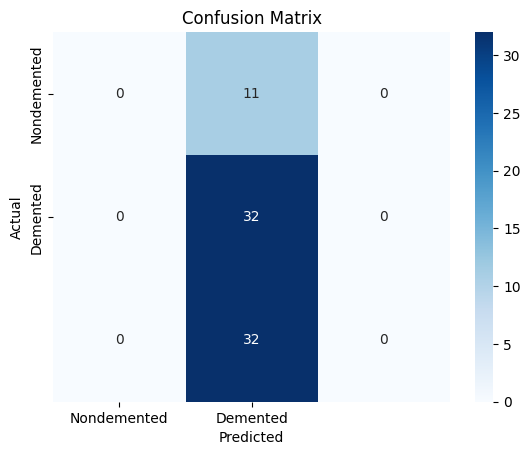

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.43      1.00      0.60        32
           2       0.00      0.00      0.00        32

    accuracy                           0.43        75
   macro avg       0.14      0.33      0.20        75
weighted avg       0.18      0.43      0.26        75

Accuracy: 42.67%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers



# Check unique values in y_train
print("Unique values in y_train:", np.unique(y_train))

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build the neural network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(256, activation='relu'),  # Hidden layer 1
    layers.Dropout(0.4),  # Increase dropout
    layers.Dense(128, activation='relu'),   # Hidden layer 2
    layers.Dropout(0.4),  # Increase dropout
    layers.Dense(64, activation='relu'),   # Hidden layer 3
    layers.Dropout(0.4),  # Increase dropout
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, class_weight=class_weights, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

print("MLP Classifier Performance:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'], yticklabels=['Nondemented', 'Demented'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = np.mean(y_pred.flatten() == y_test.to_numpy())
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
from collections import Counter
print(Counter(y_train))


Counter({2: 158, 1: 114, 0: 26})


Class distribution in y_train: Counter({2: 158, 1: 114, 0: 26})
Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.3042 - loss: 3.3555 - val_accuracy: 0.4000 - val_loss: 2.4365
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3745 - loss: 2.6648 - val_accuracy: 0.4000 - val_loss: 1.4532
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3806 - loss: 2.3217 - val_accuracy: 0.4000 - val_loss: 0.5690
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3778 - loss: 1.7619 - val_accuracy: 0.4000 - val_loss: -0.4623
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.3546 - loss: 1.7900 - val_accuracy: 0.4000 - val_loss: -1.4832
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3855 - loss: 0.5324 - val_accuracy: 0.4000 - val_loss: -3.3264
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3803 - loss: -0.0109 - val_accuracy: 0.4000 - val_loss: -5.6050
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/ste

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MLP Classifier Performance:


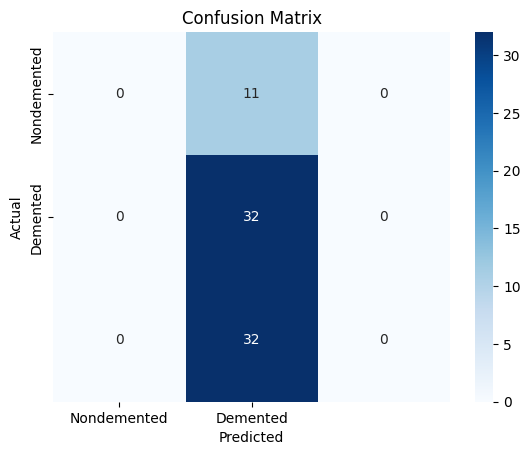

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.43      1.00      0.60        32
           2       0.00      0.00      0.00        32

    accuracy                           0.43        75
   macro avg       0.14      0.33      0.20        75
weighted avg       0.18      0.43      0.26        75

Accuracy: 42.67%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from collections import Counter

# Check class distribution
print("Class distribution in y_train:", Counter(y_train))

# Scale your features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build the neural network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model with class weights
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, class_weight=class_weights, callbacks=[early_stopping, model_checkpoint], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

print("MLP Classifier Performance:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'], yticklabels=['Nondemented', 'Demented'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = np.mean(y_pred.flatten() == y_test.to_numpy())
print(f"Accuracy: {accuracy * 100:.2f}%")



Original class distribution in y_train: Counter({2: 158, 1: 114, 0: 26})
Resampled class distribution: Counter({2: 158, 1: 158, 0: 158})
Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.2997 - loss: 3.2895 - val_accuracy: 0.9167 - val_loss: 2.8335
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2648 - loss: 2.2863 - val_accuracy: 0.9167 - val_loss: 2.4524
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2414 - loss: 1.4992 - val_accuracy: 0.9167 - val_loss: 2.2655
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2900 - loss: 0.6141 - val_accuracy: 0.9375 - val_loss: 2.2206
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3052 - loss: -2.5515 - val_accuracy: 0.9375 - val_loss: 2.4837
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2986 - loss: -9.7541 - val_accuracy: 0.9167 - val_loss: 3.1781
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3143 - loss: -22.2180 - val

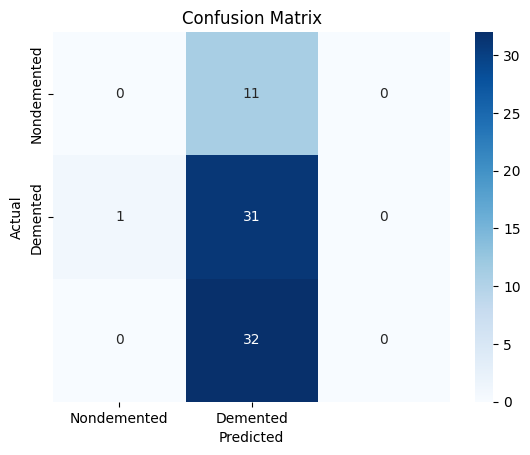

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.42      0.97      0.58        32
           2       0.00      0.00      0.00        32

    accuracy                           0.41        75
   macro avg       0.14      0.32      0.19        75
weighted avg       0.18      0.41      0.25        75

Accuracy: 41.33%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution
print("Original class distribution in y_train:", Counter(y_train))

# Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Build the neural network
model = keras.Sequential([
    layers.Input(shape=(X_resampled.shape[1],)),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model with class weights
model.fit(X_resampled, y_resampled, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping, model_checkpoint], verbose=1)

# Evaluate the model on the original test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

print("MLP Classifier Performance:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'], yticklabels=['Nondemented', 'Demented'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = np.mean(y_pred.flatten() == y_test.to_numpy())
print(f"Accuracy: {accuracy * 100:.2f}%")


# 90 and above method

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('svm', SVC(probability=True))],
    voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")


Accuracy Score: 0.8666666666666667


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.8933333333333333


In [ ]:
pip install lightgbm

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.0 MB/s eta 0:00:00
   ━━━

# Comparing Models to select the one thats most high accuracy

In [ ]:
from pycaret.classification import *

In [ ]:
exp1 = setup(data, target = 'Group', ignore_features = None)

,Description,Value
0,Session id,858
1,Target,Group
2,Target type,Multiclass
3,Original data shape,"(373, 15)"
4,Transformed data shape,"(373, 15)"
5,Transformed train set shape,"(261, 15)"
6,Transformed test set shape,"(112, 15)"
7,Numeric features,12
8,Categorical features,2
9,Rows with missing values,5.1%


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9427,0.9954,0.9427,0.9312,0.9272,0.8969,0.9037,0.1970
gbc,Gradient Boosting Classifier,0.9389,0.0000,0.9389,0.9287,0.9237,0.8903,0.8976,0.3240
ridge,Ridge Classifier,0.9312,0.0000,0.9312,0.9107,0.9109,0.8757,0.8850,0.1160
xgboost,Extreme Gradient Boosting,0.9118,0.9992,0.9118,0.9318,0.9107,0.8505,0.8636,0.1530
lr,Logistic Regression,0.8963,0.0000,0.8963,0.8683,0.8745,0.8119,0.8215,1.4870
lightgbm,Light Gradient Boosting Machine,0.8813,0.9986,0.8813,0.9003,0.8758,0.7976,0.8179,0.6760
rf,Random Forest Classifier,0.8618,0.9987,0.8618,0.8939,0.8562,0.7612,0.7854,0.4180
nb,Naive Bayes,0.8275,0.9938,0.8275,0.7822,0.7903,0.6913,0.7237,0.1490
catboost,CatBoost Classifier,0.8236,0.9956,0.8236,0.8250,0.8009,0.6897,0.7239,3.4170
dummy,Dummy Classifier,0.5095,0.5000,0.5095,0.2599,0.3441,0.0000,0.0000,0.1020


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=858, verbose=0,
                     warm_start=False)

#  Light Gradient Boosting Classifier - 90.03%

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 10
[LightGBM] [Info] Start training from score -2.329798
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -0.673213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

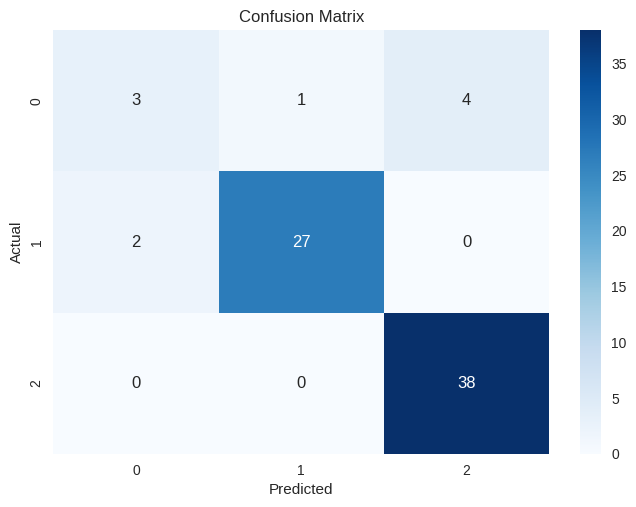

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.96      0.93      0.95        29
           2       0.90      1.00      0.95        38

    accuracy                           0.91        75
   macro avg       0.82      0.77      0.79        75
weighted avg       0.90      0.91      0.90        75

Accuracy Score: 0.9066666666666666


In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.05,  # Learning rate
    num_leaves=31,  # Maximum leaves in one tree
    colsample_bytree=0.7,  # Feature fraction
    subsample=0.7,  # Row fraction
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
print("LightGBM Classifier Performance:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")


# ExtraTreesClassifier


The Extra Trees Classifier (Extremely Randomized Trees) is an ensemble learning method that builds multiple decision trees and aggregates their results for classification tasks. It's similar to Random Forest but adds an extra layer of randomness to the decision trees, which often leads to improved performance and robustness.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies as needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Extra Trees Classifier Performance:


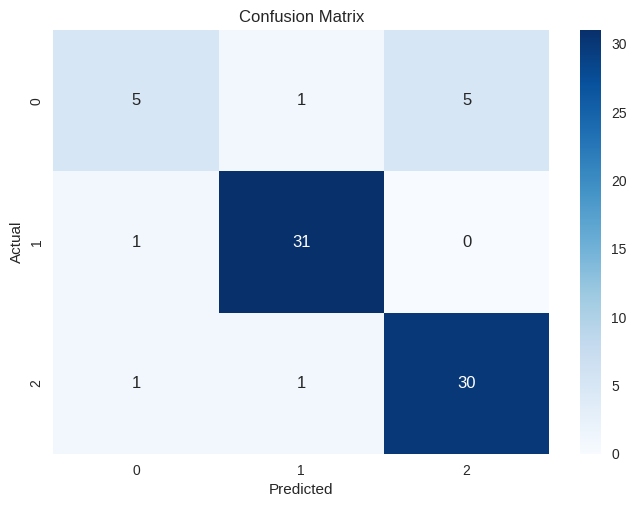

              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.94      0.97      0.95        32
           2       0.86      0.94      0.90        32

    accuracy                           0.88        75
   macro avg       0.84      0.79      0.80        75
weighted avg       0.87      0.88      0.87        75



In [ ]:
et_model = ExtraTreesClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_features='sqrt',  # Number of features to consider at every split
    max_depth=None,  # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    random_state=42,
    class_weight='balanced'  # Handle class imbalance if necessary
)

et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)


print("Extra Trees Classifier Performance:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


# Stacking Method

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
# Define base models
base_models = [
    ('lightgbm', lgb.LGBMClassifier()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('catboost', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)),
]

# Stacking classifier with logistic regression as a final estimator
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_stack))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 10
[LightGBM] [Info] Start training from score -2.438997
[LightGBM] [Info] Start training from score -0.960895
[LightGBM] [Info] Start training from score -0.634498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier
voting_model = VotingClassifier(estimators=[
    ('lightgbm', lgb.LGBMClassifier()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('catboost', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0))
], voting='soft')

voting_model.fit(X_train, y_train)

# Make predictions
y_pred_vote = voting_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_vote))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 10
[LightGBM] [Info] Start training from score -2.438997
[LightGBM] [Info] Start training from score -0.960895
[LightGBM] [Info] Start training from score -0.634498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.9194949494949496


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate class weights for handling imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
scale_pos_weight = class_weights[1] / class_weights[0]  # This is for binary classification

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=scale_pos_weight)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Train the model with the best parameters
best_model = XGBClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best score: 0.9262711864406781
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.96      0.93      0.95        29
           2       0.88      1.00      0.94        38

    accuracy                           0.89        75
   macro avg       0.78      0.73      0.74        75
weighted avg       0.87      0.89      0.88        75

Confusion Matrix:
[[ 2  1  5]
 [ 2 27  0]
 [ 0  0 38]]
Accuracy Score: 0.8933333333333333


# Cross-Validation for Individual Models: 90.6%
# Extend the Stacking Ensemble: Add CatBoostClassifier to handle categorical data, and use LogisticRegression as the meta-classifier for a binary classification task.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Initialize models with pipelines to handle missing values
xgb_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('xgb', XGBClassifier(**random_search.best_params_))
])

et_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('et', ExtraTreesClassifier(n_estimators=200, random_state=42))
])

cat_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('cat', CatBoostClassifier(iterations=200, verbose=False))
])

lgbm_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('lgbm', LGBMClassifier())
])


In [ ]:
models = {'XGBoost': xgb_model, 'ExtraTrees': et_model, 'CatBoost': cat_model, 'LightGBM': lgbm_model}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Define the stacking ensemble with pipelines that include imputers for missing values
estimators = [
    ('xgb', xgb_model),
    ('et', et_model),
    ('cat', cat_model),
    ('lgbm', lgbm_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),  # Logistic Regression as meta-classifier
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)



XGBoost CV Accuracy: 0.9195 ± 0.0324
ExtraTrees CV Accuracy: 0.8994 ± 0.0349
CatBoost CV Accuracy: 0.9061 ± 0.0360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 238, number of used features: 10
[LightGBM] [Info] Start training from score -2.336776
[LightGBM] [Info] Start training from score -0.928976
[LightGBM] [Info] Start training from score -0.676480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

StackingClassifier(estimators=[('xgb',
                                Pipeline(steps=[('imputer', SimpleImputer()),
                                                ('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=0.8,
                                                               device=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               feature_types=None,
                                                               gamma=0,
                                                               grow_policy=None,
                                                               importance_t...
                               ('et',
                                Pipeline(steps=[('imputer', SimpleImputer()),
                                                ('et',
                                                 ExtraTreesClassifier(n_estimators=200,
                                                                      random_state=42))])),
                               ('cat',
                                Pipeline(steps=[('imputer', SimpleImputer()),
                                                ('cat',
                                                 <catboost.core.CatBoostClassifier object at 0x7cae7abc3c70>)])),
                               ('lgbm',
                                Pipeline(steps=[('imputer', SimpleImputer()),
                                                ('lgbm', LGBMClassifier())]))],
                   final_estimator=LogisticRegression())

In [ ]:

y_pred_stack = stacking_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report (Stacking Model):")
print(classification_report(y_test, y_pred_stack))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_stack)}")

Classification Report (Stacking Model):
              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.97      0.97      0.97        29
           2       0.88      1.00      0.94        38

    accuracy                           0.91        75
   macro avg       0.84      0.74      0.76        75
weighted avg       0.89      0.91      0.89        75

Confusion Matrix:
[[ 2  1  5]
 [ 1 28  0]
 [ 0  0 38]]
Accuracy Score: 0.9066666666666666


# Test Data 1 & 2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:

group_mapping = {'Nondemented': 0, 'Demented': 1, 'Converted': 2}
data['Group'] = data['Group'].map(group_mapping)


for column in ['M/F', 'Hand']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

print("Group mappings:")
for group_name, encoded_value in group_mapping.items():
    print(f"{encoded_value} --> {group_name}")


print("\nSample data after encoding:")
data.head()

Group mappings:
0 --> Nondemented
1 --> Demented
2 --> Converted

Sample data after encoding:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,NaN,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,NaN,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,NaN,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,NaN,2,560,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,NaN,3,1895,1,0,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
data['Group'].unique()

In [ ]:
selected_features = ['MMSE', 'CDR', 'Age', 'eTIV', 'nWBV','M/F','EDUC','ASF','Hand','MR Delay','SES']
X = data[selected_features]
y = data['Group']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    colsample_bytree=0.7,
    subsample=0.7,
    random_state=42
)
lgb_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 298, number of used features: 10
[LightGBM] [Info] Start training from score -2.329798
[LightGBM] [Info] Start training from score -0.934920
[LightGBM] [Info] Start training from score -0.673213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, n_estimators=1000,
               random_state=42, subsample=0.7)

<Figure size 1000x600 with 0 Axes>

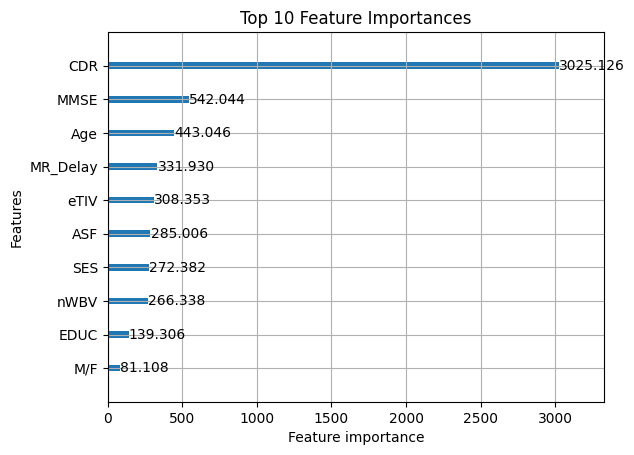

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()

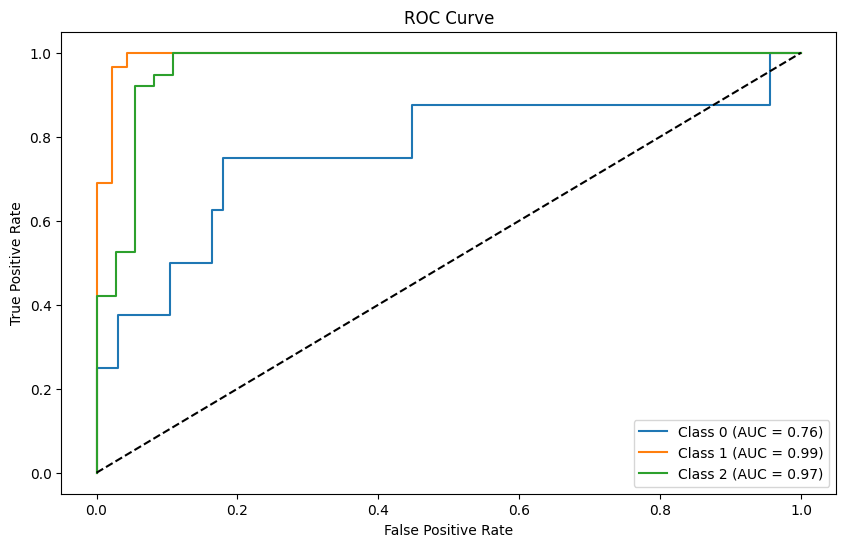

Overall AUC Score: 0.9084744771199462


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_pred_proba = lgb_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Calculate overall AUC score
print(f"Overall AUC Score: {roc_auc_score(y_test_bin, y_pred_proba, average='macro')}")

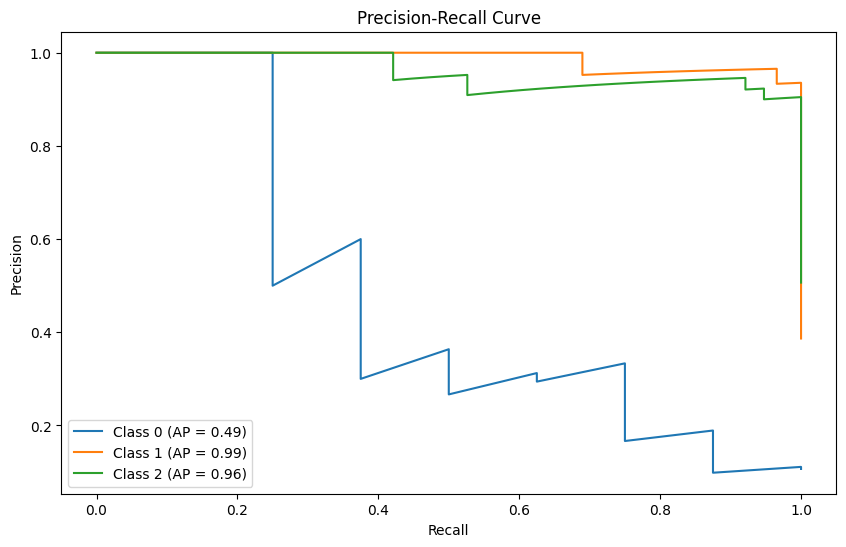

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"Class {i} (AP = {average_precision_score(y_test_bin[:, i], y_pred_proba[:, i]):.2f})")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


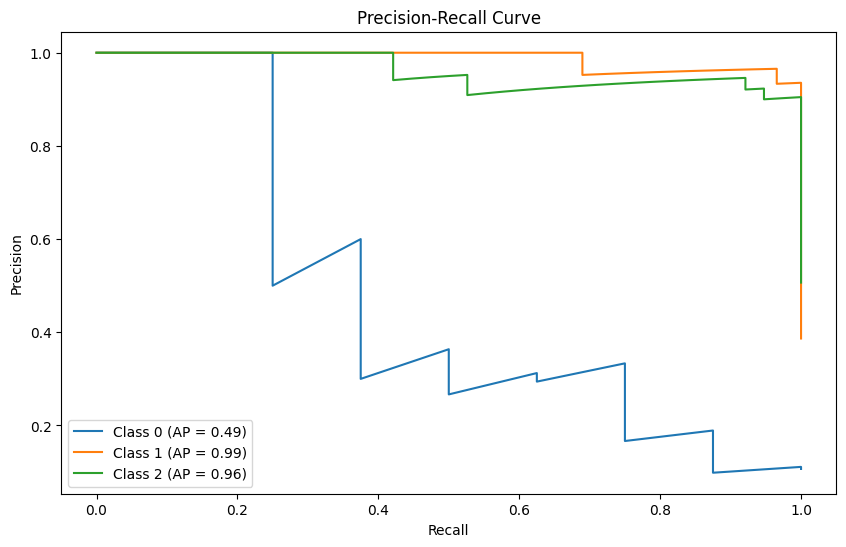

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"Class {i} (AP = {average_precision_score(y_test_bin[:, i], y_pred_proba[:, i]):.2f})")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


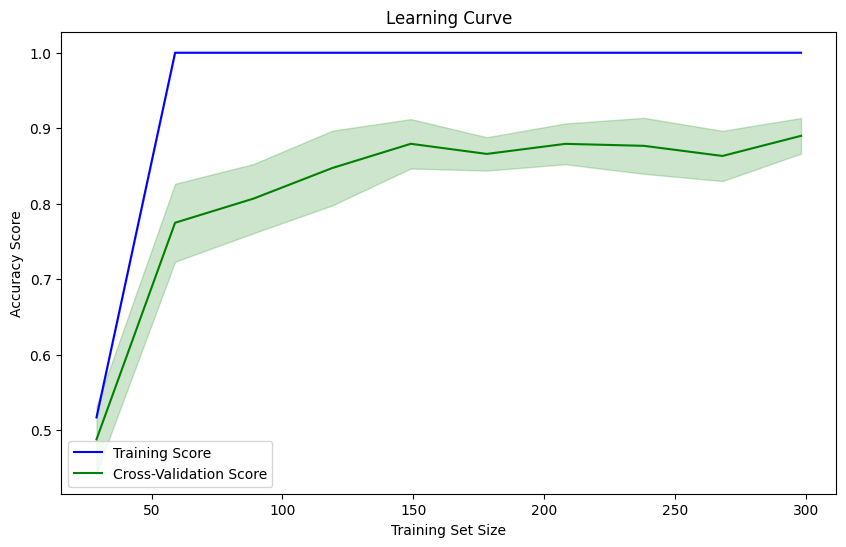

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    lgb_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and std for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


## Run code


In [ ]:
random_row = X.sample(n=1, random_state=42)
actual_label = y.loc[random_row.index[0]]
print("Test 1 - Input Data (Randomly selected row):")
print(random_row)
predicted_label = lgb_model.predict(random_row)
predicted_proba = lgb_model.predict_proba(random_row)

print("\nTest 1 - Output Data:")
print(f"Actual Label: {actual_label}")
print(f"Predicted Label: {predicted_label[0]}")
print(f"Prediction Probabilities: {predicted_proba[0]}")


Test 1 - Input Data (Randomly selected row):
     MMSE  CDR  Age  eTIV   nWBV  M/F  EDUC    ASF  Hand  MR Delay  SES
327  23.0  0.5   82  1514  0.678    1    14  1.159     0         0  2.0

Test 1 - Output Data:
Actual Label: 1
Predicted Label: 1
Prediction Probabilities: [2.19930853e-09 9.99999996e-01 1.97882945e-09]


In [ ]:
random_row_test2 = X.sample(n=1, random_state=7)
actual_label_test2 = y.loc[random_row_test2.index[0]]


print("\nTest 2 - Input Data (Another randomly selected row):")
print(random_row_test2)


predicted_label_test2 = lgb_model.predict(random_row_test2)
predicted_proba_test2 = lgb_model.predict_proba(random_row_test2)

print("\nTest 2 - Output Data:")
print(f"Actual Label: {actual_label_test2}")
print(f"Predicted Label: {predicted_label_test2[0]}")
print(f"Prediction Probabilities: {predicted_proba_test2[0]}")


Test 2 - Input Data (Another randomly selected row):
     MMSE  CDR  Age  eTIV   nWBV  M/F  EDUC    ASF  Hand  MR Delay  SES
241  30.0  0.0   73  1842  0.758    1    20  0.953     0         0  2.0

Test 2 - Output Data:
Actual Label: 2
Predicted Label: 2
Prediction Probabilities: [5.66519724e-09 7.13037062e-08 9.99999923e-01]


# Test after age group data(10 to 50) has been added

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/dementia_dataset.csv')
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [ ]:
# Function to generate random data for new cases
def generate_random_cases(n_cases):
    np.random.seed(42)  # For reproducibility
    new_cases = {
        'Subject ID': [f'NEW_{i:04d}' for i in range(n_cases)],
        'MRI ID': [f'NEW_MRI_{i:04d}' for i in range(n_cases)],
        'Group': np.random.choice(['Nondemented', 'Demented', 'Converted'], p=[0.475, 0.05, 0.475], size=n_cases),
        'Visit': np.random.randint(1, 5, size=n_cases),
        'MR Delay': np.random.randint(0, 2000, size=n_cases),  # Randomly chosen delay range
        'M/F': np.random.choice(['M', 'F'], size=n_cases),
        'Hand': np.random.choice(['L', 'R'], size=n_cases),
        'Age': np.random.randint(10, 61, size=n_cases),  # Age range between 10 and 60
        'EDUC': np.random.randint(10, 21, size=n_cases),  # Education level between 10 and 20
        'SES': np.random.choice([1.0, 2.0, 3.0, 4.0], size=n_cases, p=[0.25, 0.25, 0.25, 0.25]),  # Random socioeconomic status
        'MMSE': np.round(np.random.normal(loc=28, scale=3, size=n_cases), 1),  # MMSE score with mean around 28, sd=3
        'CDR': np.random.choice([0.0, 0.5, 1.0], size=n_cases, p=[0.8, 0.15, 0.05]),  # Randomly chosen CDR scores
        'eTIV': np.random.randint(1100, 2000, size=n_cases),  # Total intracranial volume
        'nWBV': np.round(np.random.uniform(0.6, 0.8, size=n_cases), 3),  # Normalized whole brain volume
        'ASF': np.round(np.random.uniform(0.8, 1.5, size=n_cases), 3)  # Atlas scaling factor
    }
    return pd.DataFrame(new_cases)

In [ ]:
new_data = generate_random_cases(30)
updated_data = pd.concat([data, new_data], ignore_index=True)

In [ ]:
updated_data.sample(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
192,OAS2_0091,OAS2_0091_MR1,Nondemented,1,0,M,R,75,12,4.0,28.0,0.0,1511,0.739,1.162
294,OAS2_0143,OAS2_0143_MR3,Nondemented,3,1553,F,R,93,18,2.0,29.0,0.0,1744,0.723,1.006
168,OAS2_0078,OAS2_0078_MR1,Nondemented,1,0,M,R,89,16,1.0,28.0,0.0,1631,0.674,1.076
225,OAS2_0106,OAS2_0106_MR1,Demented,1,0,F,R,70,11,4.0,22.0,1.0,1445,0.722,1.214
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228


In [ ]:

group_mapping = {'Nondemented': 0, 'Demented': 1, 'Converted': 2}
updated_data['Group'] = updated_data['Group'].map(group_mapping)


for column in ['M/F', 'Hand']:
    le = LabelEncoder()
    updated_data[column] = le.fit_transform(updated_data[column])

print("Group mappings:")
for group_name, encoded_value in group_mapping.items():
    print(f"{encoded_value} --> {group_name}")


print("\nSample data after encoding:")
updated_data.head()

Group mappings:
0 --> Nondemented
1 --> Demented
2 --> Converted

Sample data after encoding:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
selected_features = ['MMSE', 'CDR', 'Age', 'eTIV', 'nWBV','M/F','EDUC','ASF','Hand','MR Delay','SES']
X = updated_data[selected_features]
y = updated_data['Group']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    colsample_bytree=0.7,
    subsample=0.7,
    random_state=42
)
lgb_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 322, number of used features: 10
[LightGBM] [Info] Start training from score -0.662564
[LightGBM] [Info] Start training from score -1.003867
[LightGBM] [Info] Start training from score -2.136965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, n_estimators=1000,
               random_state=42, subsample=0.7)

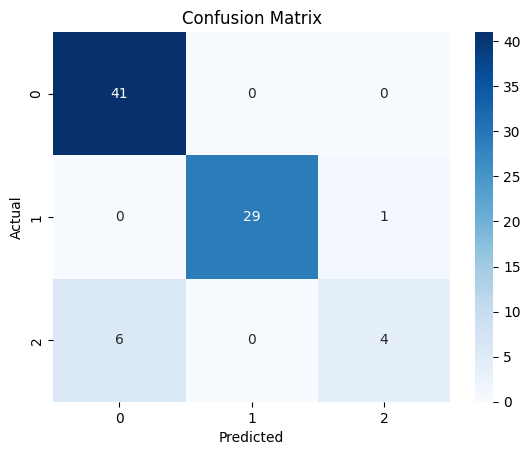

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        41
           1       1.00      0.97      0.98        30
           2       0.80      0.40      0.53        10

    accuracy                           0.91        81
   macro avg       0.89      0.79      0.82        81
weighted avg       0.91      0.91      0.90        81

Accuracy Score: 0.9135802469135802


In [ ]:
y_pred = lgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

## Test Case 1 run code

In [ ]:
test_case_1 = pd.DataFrame({
    'MMSE': [np.random.uniform(20, 30)],           # Random MMSE score within a plausible range
    'CDR': [0.5],                                  # Choose a CDR score representing mild cognitive impairment
    'Age': [np.random.randint(60, 90)],            # Age within typical range for the dataset
    'eTIV': [np.random.randint(1500, 2000)],       # Total intracranial volume in a plausible range
    'nWBV': [round(np.random.uniform(0.6, 0.8), 3)],  # Normalized whole brain volume
    'M/F': [1],                                    # Encode Male as 1
    'EDUC': [np.random.randint(12, 20)],           # Education years
    'ASF': [round(np.random.uniform(0.8, 1.5), 3)],  # Atlas scaling factor
    'Hand': [0],                                   # Encode Right hand as 0
    'MR Delay': [np.random.randint(0, 2000)],      # MR delay within a reasonable range
    'SES': [np.random.choice([1.0, 2.0, 3.0, 4.0])]  # Socioeconomic status
})
print("Test Case 1:")
print(test_case_1)

Test Case 1:
        MMSE  CDR  Age  eTIV   nWBV  M/F  EDUC    ASF  Hand  MR Delay  SES
0  26.675577  0.5   77  1560  0.638    1    14  1.375     0      1489  4.0


In [ ]:
test_data = pd.concat([test_case_1], ignore_index=True)
actual_labels = [1]
predicted_labels = lgb_model.predict(test_data)
prediction_probabilities = lgb_model.predict_proba(test_data)
for i, (actual, predicted, probs) in enumerate(zip(actual_labels, predicted_labels, prediction_probabilities), 1):
    print(f"Test Case {i} - Input Data:\n{test_data.iloc[i-1]}")
    print(f"Actual Label: {actual}")
    print(f"Predicted Label: {predicted}")
    print(f"Prediction Probabilities: {probs}\n")

Test Case 1 - Input Data:
MMSE          26.675577
CDR            0.500000
Age           77.000000
eTIV        1560.000000
nWBV           0.638000
M/F            1.000000
EDUC          14.000000
ASF            1.375000
Hand           0.000000
MR Delay    1489.000000
SES            4.000000
Name: 0, dtype: float64
Actual Label: 1
Predicted Label: 1
Prediction Probabilities: [2.51955586e-04 8.43933055e-01 1.55814989e-01]



## Test Case 2 run code

In [ ]:
# Generate Test Case 2
test_case_2 = pd.DataFrame({
    'MMSE': [np.random.uniform(20, 30)],
    'CDR': [0.0],                                  # CDR score indicating non-demented
    'Age': [np.random.randint(60, 90)],
    'eTIV': [np.random.randint(1500, 2000)],
    'nWBV': [round(np.random.uniform(0.6, 0.8), 3)],
    'M/F': [0],                                    # Encode Female as 0
    'EDUC': [np.random.randint(12, 20)],
    'ASF': [round(np.random.uniform(0.8, 1.5), 3)],
    'Hand': [1],                                   # Encode Left hand as 1
    'MR Delay': [np.random.randint(0, 2000)],
    'SES': [np.random.choice([1.0, 2.0, 3.0, 4.0])]
})
print("Test Case 2:")
print(test_case_2)


Test Case 2:
        MMSE  CDR  Age  eTIV  nWBV  M/F  EDUC    ASF  Hand  MR Delay  SES
0  23.476192  0.0   81  1904  0.71    0    16  1.123     1       345  2.0


In [ ]:
test_data = pd.concat([test_case_2], ignore_index=True)
actual_labels = [2]
predicted_labels = lgb_model.predict(test_data)
prediction_probabilities = lgb_model.predict_proba(test_data)
for i, (actual, predicted, probs) in enumerate(zip(actual_labels, predicted_labels, prediction_probabilities), 1):
    print(f"Test Case 2 - Input Data:\n{test_data.iloc[i-1]}")
    print(f"Actual Label: {actual}")
    print(f"Predicted Label: {predicted}")
    print(f"Prediction Probabilities: {probs}\n")

Test Case 2 - Input Data:
MMSE          23.476192
CDR            0.000000
Age           81.000000
eTIV        1904.000000
nWBV           0.710000
M/F            0.000000
EDUC          16.000000
ASF            1.123000
Hand           1.000000
MR Delay     345.000000
SES            2.000000
Name: 0, dtype: float64
Actual Label: 2
Predicted Label: 0
Prediction Probabilities: [9.99997467e-01 2.53135949e-06 1.88426293e-09]

